<a href="https://colab.research.google.com/github/richardkilea/BINARY-CLASSIFICATION-OF-SOFTWARE-DEFECTS/blob/main/Copy_of_Retail_Price_Optimization_based_on_price_Elasticity_of_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

In this machine learning pricing project, we implement a retail price optimization algorithm using regression trees. This is one of the first steps to building a dynamic pricing model.
# Introduction to Price Optimization
Pricing a product is a crucial aspect of any business. A lot of thought process is put into it. There are different strategies to estimate prices for different kinds of products. There are products whose sales are pretty sensitive to their costs, and as such, a slight change in their price can lead to a noticeable difference in their sales. At the same time, there are also products whose sales are not much affected by their worth - these tend to be luxury items or necessities (like certain medicines).



Price elasticity of demand (EPD), or elasticity, is the degree to which the compelling desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customers’ desire could drop sharply even with a bit of price increase, and for other products, it could stay almost the same even with a hefty price increase. Economists use the term elasticity to denote this sensitivity of sales to price fluctuations. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# load data
df1 = pd.read_csv('/content/Cafe+-+DateInfo.csv')
df2 = pd.read_csv('/content/Cafe+-+Sell+Meta+Data.csv')
df3 = pd.read_csv('/content/Cafe+-+Transaction+-+Store.csv')

In [78]:
df1.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [79]:
df1.shape

(1349, 7)

In [80]:
df1.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


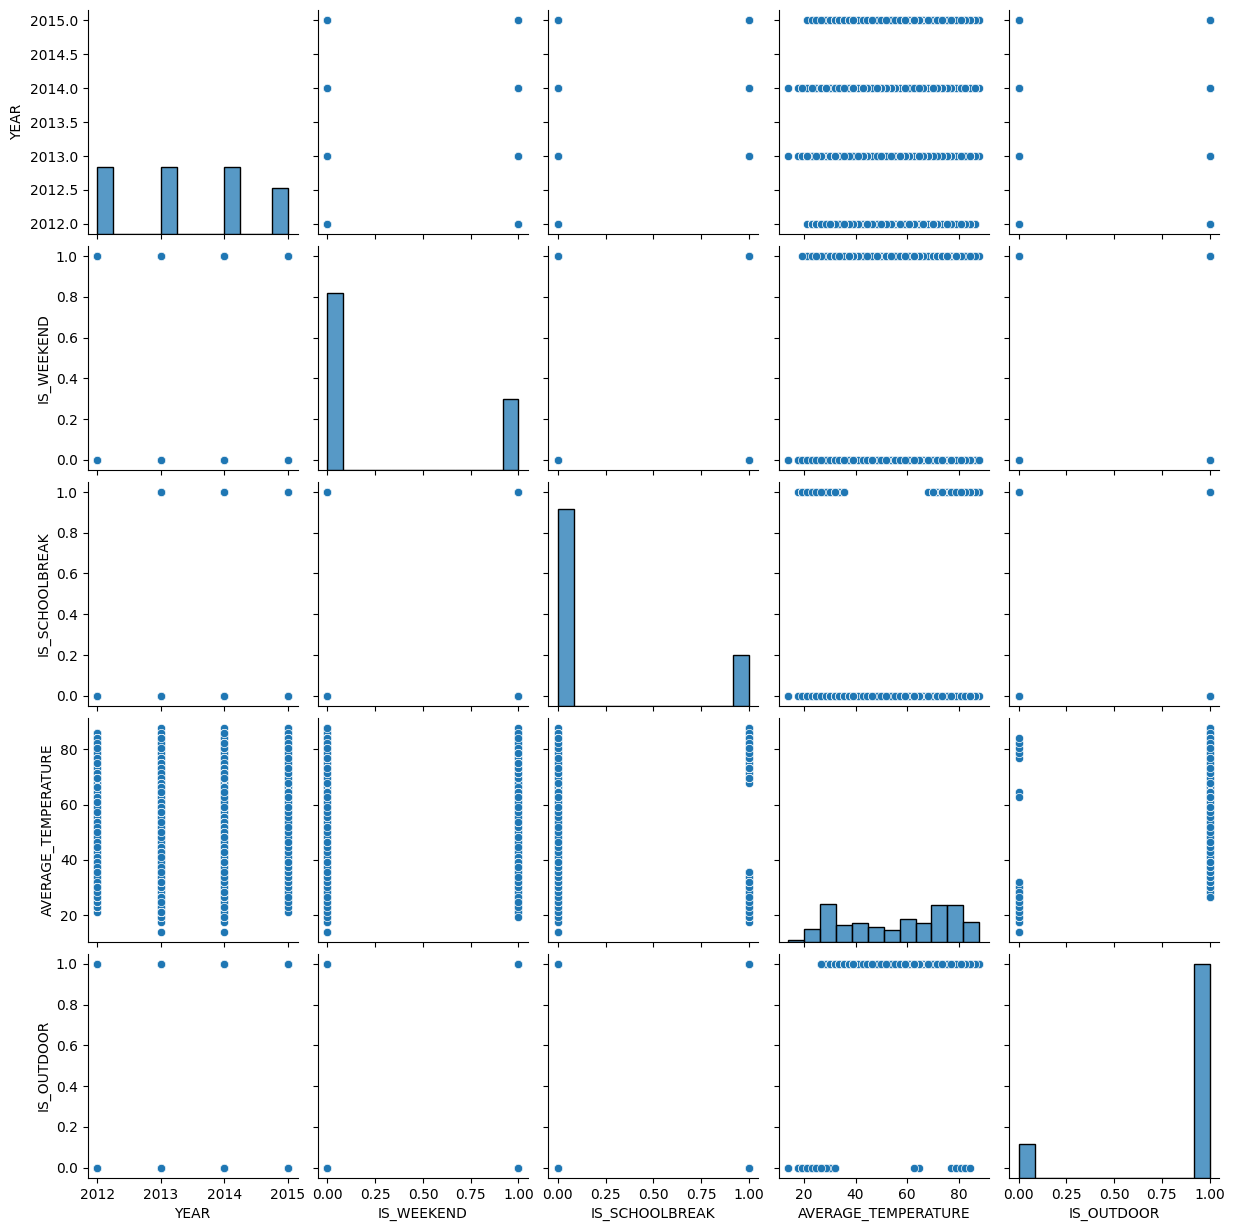

In [81]:
# plot a pairplot for the data
sns.pairplot(df1)

In [82]:
df1.columns = df1.columns.str.lower()

In [83]:
df1.head()

,calendar_date,year,holiday,is_weekend,is_schoolbreak,average_temperature,is_outdoor
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [84]:
df2.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [85]:
df2.shape

(11, 4)

In [86]:
df2.columns = df2.columns.str.lower()

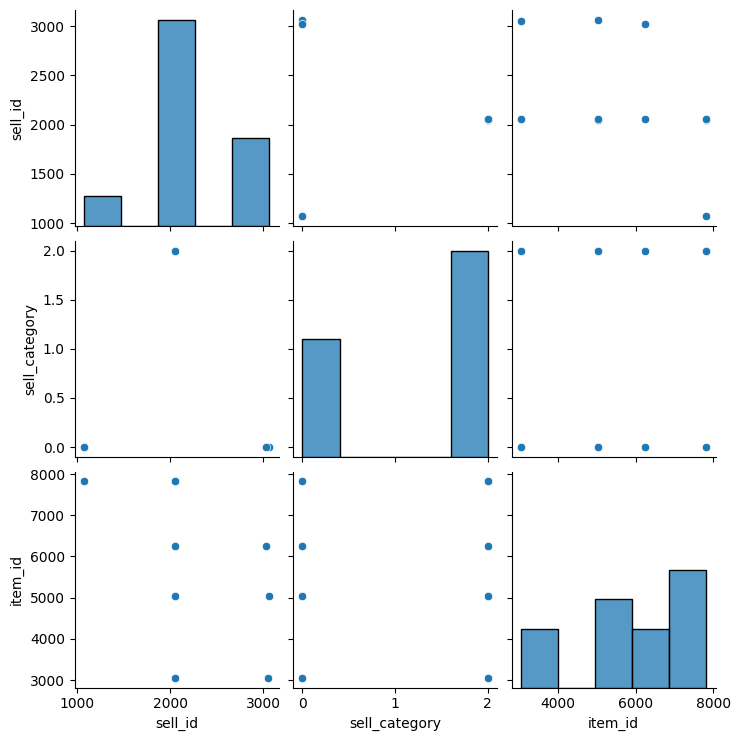

In [87]:
# plot a pairplot for the data
sns.pairplot(df2)

In [88]:
df3.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [89]:
df3.shape

(5404, 5)

In [90]:
df3.columns = df3.columns.str.lower()

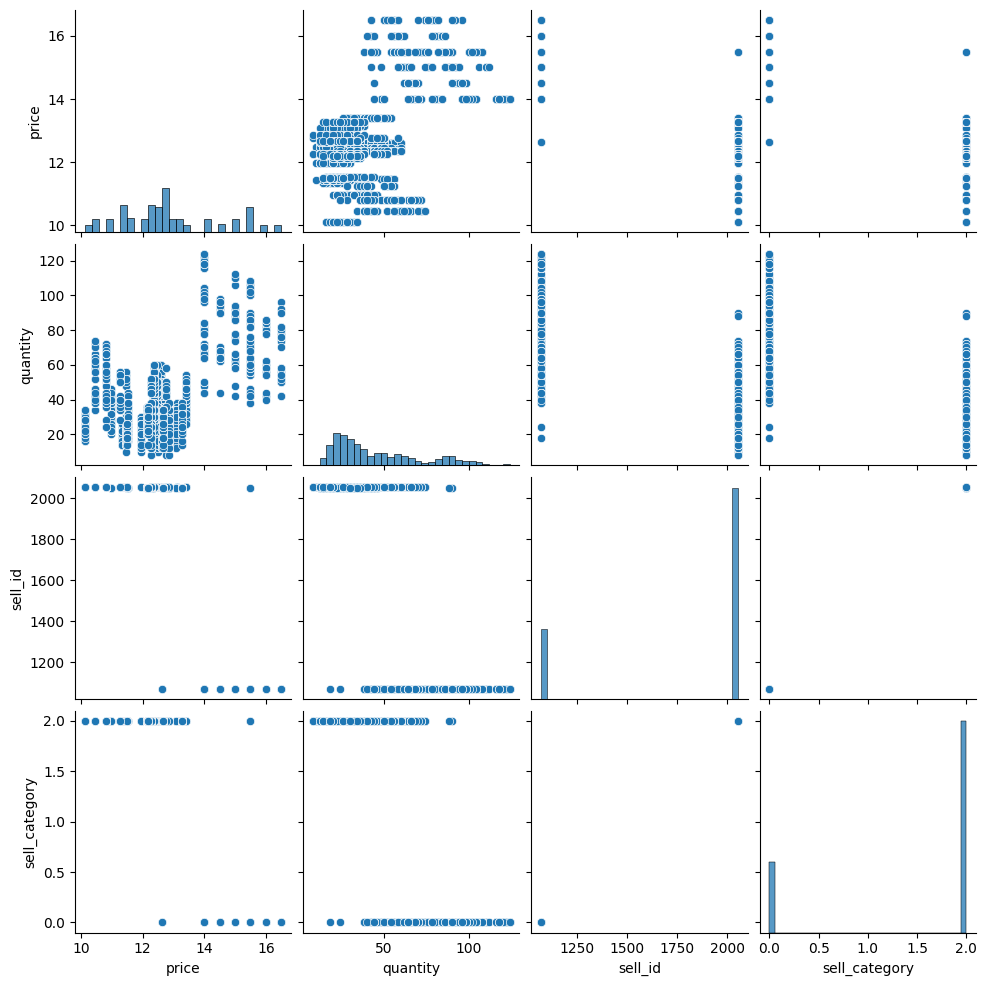

In [91]:
# plot a pairplot for the data
sns.pairplot(df3)

In [92]:
df_merge = df2.merge(df3, on=['sell_id', 'sell_category'])

In [93]:
df_merge.head()

,sell_id,sell_category,item_id,item_name,calendar_date,price,quantity
0,1070,0,7821,BURGER,01/01/12,15.5,46
1,1070,0,7821,BURGER,01/02/12,15.5,70
2,1070,0,7821,BURGER,01/03/12,15.5,62
3,1070,0,7821,BURGER,01/04/12,15.5,88
4,1070,0,7821,BURGER,01/05/12,15.5,104


In [94]:
df1.head()

,calendar_date,year,holiday,is_weekend,is_schoolbreak,average_temperature,is_outdoor
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [95]:
df_final = df_merge.merge(df1, on='calendar_date')

In [96]:
df_final.head()

,sell_id,sell_category,item_id,item_name,calendar_date,price,quantity,year,holiday,is_weekend,is_schoolbreak,average_temperature,is_outdoor
0,1070,0,7821,BURGER,1/13/12,15.50,100,2012,NaN,0,0,26.6,0
1,2051,2,7821,BURGER,1/13/12,12.73,40,2012,NaN,0,0,26.6,0
2,2051,2,5030,COKE,1/13/12,12.73,40,2012,NaN,0,0,26.6,0
3,2052,2,7821,BURGER,1/13/12,12.75,26,2012,NaN,0,0,26.6,0
4,2052,2,6249,LEMONADE,1/13/12,12.75,26,2012,NaN,0,0,26.6,0


In [97]:
df = df_final.copy()

In [98]:
df.head()

,sell_id,sell_category,item_id,item_name,calendar_date,price,quantity,year,holiday,is_weekend,is_schoolbreak,average_temperature,is_outdoor
0,1070,0,7821,BURGER,1/13/12,15.50,100,2012,NaN,0,0,26.6,0
1,2051,2,7821,BURGER,1/13/12,12.73,40,2012,NaN,0,0,26.6,0
2,2051,2,5030,COKE,1/13/12,12.73,40,2012,NaN,0,0,26.6,0
3,2052,2,7821,BURGER,1/13/12,12.75,26,2012,NaN,0,0,26.6,0
4,2052,2,6249,LEMONADE,1/13/12,12.75,26,2012,NaN,0,0,26.6,0


# lets perfom some EDA

In [99]:
df.shape

(6696, 13)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6696 entries, 0 to 6695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sell_id              6696 non-null   int64  
 1   sell_category        6696 non-null   int64  
 2   item_id              6696 non-null   int64  
 3   item_name            6696 non-null   object 
 4   calendar_date        6696 non-null   object 
 5   price                6696 non-null   float64
 6   quantity             6696 non-null   int64  
 7   year                 6696 non-null   int64  
 8   holiday              192 non-null    object 
 9   is_weekend           6696 non-null   int64  
 10  is_schoolbreak       6696 non-null   int64  
 11  average_temperature  6696 non-null   float64
 12  is_outdoor           6696 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 732.4+ KB


In [101]:
df.calendar_date = pd.DatetimeIndex(df.calendar_date)

In [102]:
# Sort DataFrame in date order
df.sort_values(by=["calendar_date"], inplace=True, ascending=True)
df.calendar_date.head(10)

0    2012-01-13
1    2012-01-13
2    2012-01-13
3    2012-01-13
4    2012-01-13
5    2012-01-13
6    2012-01-13
7    2012-01-13
15   2012-01-14
14   2012-01-14
Name: calendar_date, dtype: datetime64[ns]

In [103]:
# Add datetime parameters for calendar_date
df["calendar_year"] = df.calendar_date.dt.year
df["calendar_month"] = df.calendar_date.dt.month
df["calendar_day"] = df.calendar_date.dt.day

# Drop original calendar_date
df.drop("calendar_date", axis=1, inplace=True)

In [104]:
df.head().T

,0,1,2,3,4
sell_id,1070,2051,2051,2052,2052
sell_category,0,2,2,2,2
item_id,7821,7821,5030,7821,6249
item_name,BURGER,BURGER,COKE,BURGER,LEMONADE
price,15.5,12.73,12.73,12.75,12.75
quantity,100,40,40,26,26
year,2012,2012,2012,2012,2012
holiday,NaN,NaN,NaN,NaN,NaN
is_weekend,0,0,0,0,0
is_schoolbreak,0,0,0,0,0


In [105]:
df.isna().sum()

sell_id                   0
sell_category             0
item_id                   0
item_name                 0
price                     0
quantity                  0
year                      0
holiday                6504
is_weekend                0
is_schoolbreak            0
average_temperature       0
is_outdoor                0
calendar_year             0
calendar_month            0
calendar_day              0
dtype: int64

In [106]:
# null value imputation
df['holiday'] = df['holiday'].fillna("No Holiday")

In [107]:
df.isna().sum()

sell_id                0
sell_category          0
item_id                0
item_name              0
price                  0
quantity               0
year                   0
holiday                0
is_weekend             0
is_schoolbreak         0
average_temperature    0
is_outdoor             0
calendar_year          0
calendar_month         0
calendar_day           0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6696 entries, 0 to 6695
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sell_id              6696 non-null   int64  
 1   sell_category        6696 non-null   int64  
 2   item_id              6696 non-null   int64  
 3   item_name            6696 non-null   object 
 4   price                6696 non-null   float64
 5   quantity             6696 non-null   int64  
 6   year                 6696 non-null   int64  
 7   holiday              6696 non-null   object 
 8   is_weekend           6696 non-null   int64  
 9   is_schoolbreak       6696 non-null   int64  
 10  average_temperature  6696 non-null   float64
 11  is_outdoor           6696 non-null   int64  
 12  calendar_year        6696 non-null   int64  
 13  calendar_month       6696 non-null   int64  
 14  calendar_day         6696 non-null   int64  
dtypes: float64(2), int64(11), object(2)
me

In [109]:
df.head()

,sell_id,sell_category,item_id,item_name,price,quantity,year,holiday,is_weekend,is_schoolbreak,average_temperature,is_outdoor,calendar_year,calendar_month,calendar_day
0,1070,0,7821,BURGER,15.50,100,2012,No Holiday,0,0,26.6,0,2012,1,13
1,2051,2,7821,BURGER,12.73,40,2012,No Holiday,0,0,26.6,0,2012,1,13
2,2051,2,5030,COKE,12.73,40,2012,No Holiday,0,0,26.6,0,2012,1,13
3,2052,2,7821,BURGER,12.75,26,2012,No Holiday,0,0,26.6,0,2012,1,13
4,2052,2,6249,LEMONADE,12.75,26,2012,No Holiday,0,0,26.6,0,2012,1,13


# splitting of our data

In [110]:
X = df.drop('price', axis=1)
y = df['price']


In [111]:
X.shape, y.shape

((6696, 14), (6696,))

In [112]:
corr = df.corr()

<ipython-input-112-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [113]:
corr.style.background_gradient(cmap='YlOrBr_r')

,sell_id,sell_category,item_id,price,quantity,year,is_weekend,is_schoolbreak,average_temperature,is_outdoor,calendar_year,calendar_month,calendar_day
sell_id,1.000000,0.999997,-0.332741,-0.765418,-0.754632,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
sell_category,0.999997,1.000000,-0.332047,-0.765130,-0.755491,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
item_id,-0.332741,-0.332047,1.000000,0.273092,0.047885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
price,-0.765418,-0.765130,0.273092,1.000000,0.438040,-0.028807,0.002215,0.024734,-0.073708,-0.038449,-0.028807,-0.140335,0.006875
quantity,-0.754632,-0.755491,0.047885,0.438040,1.000000,0.000453,-0.279660,-0.012666,-0.037449,-0.099802,0.000453,0.048780,-0.008920
year,-0.000000,-0.000000,0.000000,-0.028807,0.000453,1.000000,0.001001,0.303195,0.109060,0.068162,1.000000,-0.173538,0.019784
is_weekend,0.000000,0.000000,0.000000,0.002215,-0.279660,0.001001,1.000000,0.001517,0.017842,0.016221,0.001001,0.006284,0.005961
is_schoolbreak,-0.000000,-0.000000,0.000000,0.024734,-0.012666,0.303195,0.001517,1.000000,0.216479,-0.050396,0.303195,-0.104349,0.084970
average_temperature,0.000000,0.000000,0.000000,-0.073708,-0.037449,0.109060,0.017842,0.216479,1.000000,0.525930,0.109060,0.115323,0.056109
is_outdoor,0.000000,0.000000,0.000000,-0.038449,-0.099802,0.068162,0.016221,-0.050396,0.525930,1.000000,0.068162,0.056973,0.003106


In [114]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['item_name', 'holiday']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+00,
        1.300e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+00,
        1.300e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.012e+03, 1.000e+00,
        1.300e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.015e+03, 8.000e+00,
        3.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.015e+03, 8.000e+00,
        3.100e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.015e+03, 8.000e+00,
        3.100e+01]])

In [115]:
# split our data into train
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)


In [135]:
X_train.shape, X_test.shape

((5356, 21), (1340, 21))

# modelling

In [119]:
#importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.6862509616561265

In [136]:
# k-fold CV (using all the 13 variables)
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
scores

array([0.71269366, 0.67062041, 0.718877  , 0.70162534, 0.6762798 ])

In [125]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
# Predict the model
pred = rf.predict(X_test)
# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.9960778952935517

In [129]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, transformed_X, y, cv=10)

array([ 0.91014746,  0.92890602,  0.85960166,  0.94332675,  0.36571648,
        0.76341319,  0.77679999, -1.99378535, -0.10853184,  0.71173017])

In [133]:
# Take the mean of 10-fold cross-validation score
rf_cross_val_score = np.mean(cross_val_score(rf, transformed_X, y, cv=10))
print(rf_cross_val_score)

0.4117158794627385


In [124]:
#Lets use XGB
from  xgboost import XGBRegressor
Xg_model = XGBRegressor(n_estimators = 10, seed = 42)
Xg_model.fit(X_train, y_train)
# Predict the model
pred = Xg_model.predict(X_test)
Xg_model.score(X_test, y_test)

0.9214764684824643

In [ ]:
from sklearn.model_selection import cross_val_score
